# About
* With reference to Allen Downey's Think Stats and Towards data science articles, this notebook seeks to implement the basics of binomial distribution

# What it covers
1. Bernoulli trial
2. Binomial distribution
    * 2.1 The binomial coefficient
    * 2.2 The binomial density funtion (PMF)
    * 2.3 The cumulative density funtion (CDF)
* The behavior of binoimal distribution
* Binomial distribution functions in Python
* 4.2 Python
* Binomial distribution in practice


# Relevant packages
* Many different librairies to implement, notable ones being:
    * scipy stats module
    * matplotlib
* From scratch (yikes!)

# 1. Bernoulli trial
* TLDR: binomial but n=1
* A Bernoulli trial is a random experiment that has exactly two possible outcomes, typically denoted as “success” (1) and “failure” (0)
    * SUCCESS = meeting a certain criteria
    * FAILURE = failing to do so
* `q`: probability of success, `p`: probability of failure
    * `q=1-p`
* Since there is no other option to choose than 0 or 1, the sum of probabilities of success and failure is always equal to 1.

* The bernoulli trial is assumed to meet each of these criteria:
    * There must be only 2 possible outcomes.
    * Each outcome has a fixed probability of occurring. A success has the probability of p, and a failure has the probability of 1 – p.
    * Each trial is completely independent of all others. 

# 1. Implementing the bernoulli distribution
* `scipy.stats.bernoulli()'
    * Bernoulli discrete random variable
    * inherited from generic methods, is an instance of the `rv_dicrete class`
* parameters
    * x : quantiles
    * loc : [optional]location parameter. Default = 0
    * scale : [optional]scale parameter. Default = 1
    * moments : [optional] composed of letters [‘mvsk’]; ‘m’ = mean, ‘v’ = variance, ‘s’ = Fisher’s skew and ‘k’ = Fisher’s kurtosis. (default = ‘mv’).

## 1.1. create bernoulli discrete random various

In [6]:
from scipy.stats import bernoulli

numargs = bernoulli.numargs
a,b = 0.2, 0.8
rv = bernoulli(a,b)

print("RV : \n", rv)

RV : 


## 1.2. Bernoulli discrete variates and probability distribution

In [7]:
import numpy as np

In [9]:
quantile = np.arange(0.01,1,0.1)

#random variates
R = bernoulli.rvs(a,b,size=10)
print("Random Variates: \n", R)

# pdf
x = np.linspace(bernoulli.ppf(0.01,a,b),
               bernoulli.ppf(0.99,a,b), 10)
R = bernoulli.ppf(x,1,3)
print ("\nProbability Distribution : \n", R) 

Random Variates: 
 [0 1 0 0 0 0 1 1 0 0]

Probability Distribution : 
 [ 4.  4. nan nan nan nan nan nan nan nan]


## 1.3. Graphical Representation.

Distribution : 
 [0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


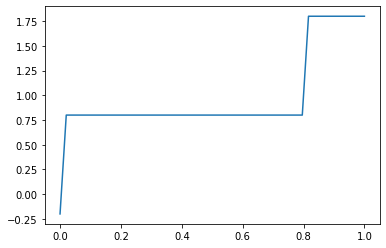

In [10]:
import matplotlib.pyplot as plt 
     
distribution = np.linspace(0, np.minimum(rv.dist.b, 2)) 
print("Distribution : \n", distribution) 
     
plot = plt.plot(distribution, rv.ppf(distribution)) 

## 1.4 : Varying Positional Arguments

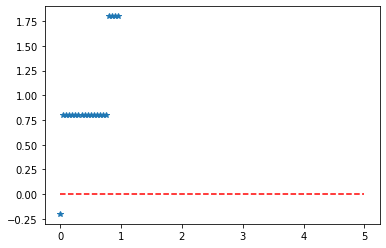

In [11]:
x = np.linspace(0, 5, 100) 
     
# Varying positional arguments 
y1 = bernoulli.ppf(x, a, b) 
y2 = bernoulli.pmf(x, a, b) 
plt.plot(x, y1, "*", x, y2, "r--") 

---
# 2. Binomial Distribution
* Binomial distribution is a probability distribution that summarises the likelihood that a variable will take one of two independent values under a given set of parameters. 
* The distribution is obtained by performing a number of Bernoulli trials.
* It inherits the critera
    * only 2 possible outcomes i.e. success/failure
    * Each outcome has a fixed probability of occurring. A success has the probability of p, and a failure has the probability of 1 – p.
    * Each trial is completely independent of all others.
* The binomial random variable represents the number of successes(r) in n successive independent trials of a Bernoulli experiment.

* Probability of achieving r success and n-r failure is :
    * p^r * (1-p)^(n-r)
* The number of ways we can achieve r successes is : 
    * n! / ((n-r)! * r!)
* Hence, the probability mass function(pmf), which is the total probability of achieving r success and n-r failure is 
    * p^r * (1-p)^(n-r) * n! / ((n-r)! * r!)

## 2.1 Implementing with Scipy 
* Functions
    * `scipy.stats.binom.pmf(r, n, p)`
        * use to obtain probability mass function for a certain value of r, n and p
        * we can obtain the distribution by passing all possible values of r(0 to n)
* What we need to do to get a distribution table:
    * Define n and p.
    * Define a list of values of r from 0 to n.
    * Get mean and variance.
    * For each r, calculate the pmf and store in a list.


In [12]:
import scipy

In [15]:
from scipy.stats import binom

# set the values of n and p
n= 6
p= 0.6

# define the list of r values
r_values = list(range(n+1))

#obtain mean and variance
mean,var = binom.stats(n,p)

#list of pmf values
dist = [binom.pmf(r,n,p) for r in r_values]

# print the table
print("r\tp(r)")
for i in range(n + 1):
    print(str(r_values[i]) + "\t" + str(dist[i]))
    
# printing mean and variance
print("mean = "+str(mean))
print("variance = "+str(var))

r	p(r)
0	0.0040960000000000015
1	0.03686400000000002
2	0.1382400000000001
3	0.2764800000000001
4	0.3110400000000001
5	0.1866240000000001
6	0.04665599999999999
mean = 3.5999999999999996
variance = 1.44


## 2.2 Plotting the graph using matplotlib.pyplot.bar() function to plot vertical bars.

> note: perhaps redo with plotly instead

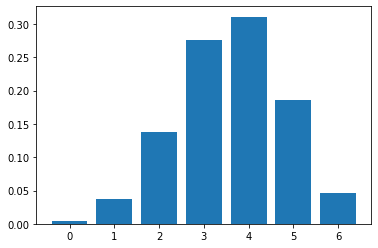

In [16]:
from scipy.stats import binom
import matplotlib.pyplot as plt
# setting the values
# of n and p
n = 6
p = 0.6
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values
dist = [binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.bar(r_values, dist)
plt.show()

## 2.3 Worked example
> * In a lottery, five balls are chosen from the pool of 20 balls. 
> * How many lottery tickets do you need to buy to ensure a win? 
> * At first we have 20 balls to choose from, 19 for the second choice, 18 for third, etc. 

* number of ways to choose five balls of pool with 20 balls (here, the order doesn't matter)
    * 20*19*18*17*16 = 1,860,480
* So from 1,860,480 ways, we need to reduce this!
* We can do this by choosing by duplicates (the number of ordering ways for selected balls)
    * 5 balls -> 5! -> 120 different ways
* 1,860,480 / 120 = 15,504
* hm but is it really worth it?

## Revisiting binomial coefficient
* (20 choose 5) : 20!/(5! * (20-5)!)
* In the numerator, we see the number of ways we can order the pool of balls is 20! (i.e. N!)
* In the denominator, we can reduce the outcome by the dividing by common terms
    * the numbers
        * ways of ordering 5! selected balls (m!)
        * the possibilities to order the remaining balls is (N-m)! -> 15!
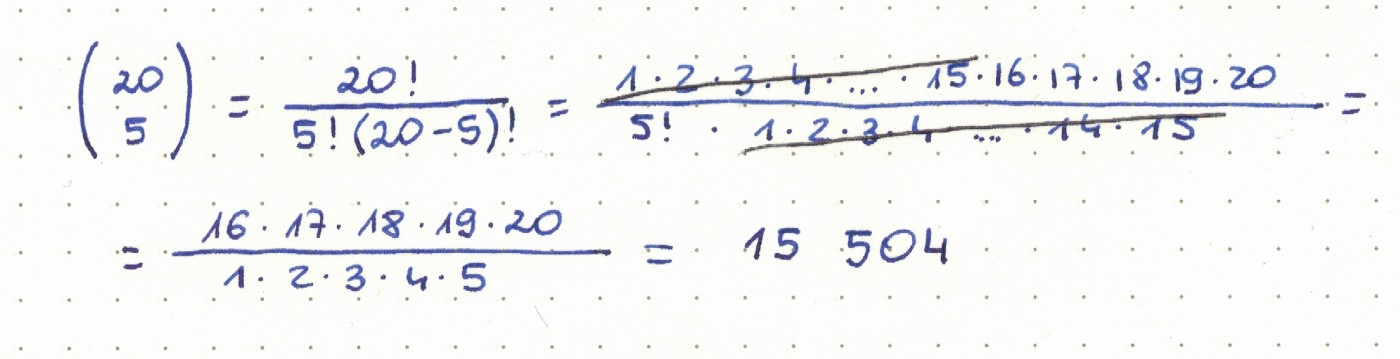
* We arrive at the same answer but in an easier way!

---
# Binomial Density Function (PMF